# Sentiment Analysis of IMDB Movie Reviews

In this, we have to predict the number of positive and negative reviews based on sentiments by using different classification models.

Dataset is taken from https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

## IMPORT THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

## LOAD THE DATA

In [3]:
dataset=pd.read_csv('C:/Users/HP/Desktop/coursera/project/text_classification/IMDB Dataset.csv')

## EDA

View the dataset

In [4]:
dataset

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


Get some information about the dataset

In [5]:
dataset.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
review       50000 non-null object
sentiment    50000 non-null object
dtypes: object(2)
memory usage: 781.4+ KB


Count the number of positive and negative reviews in the dataset

In [7]:
dataset['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

## TRAIN TEST SPLIT

In [8]:
X_train=dataset.review[:40000]
y_train=dataset.sentiment[:40000]
X_test=dataset.review[40000:]
y_test=dataset.review[40000:]

In [9]:
X_train

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
39995    This was a marvelously funny comedy with a gre...
39996    There is no plot. There are no central charact...
39997    This show is awesome! I love all the actors! I...
39998    The fact that this movie has been entitled to ...
39999    I have to confess that I am severely disappoin...
Name: review, Length: 40000, dtype: object

In [10]:
X_train.shape

(40000,)

In [11]:
y_train

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
39995    positive
39996    positive
39997    positive
39998    negative
39999    negative
Name: sentiment, Length: 40000, dtype: object

In [12]:
y_train.shape

(40000,)

In [13]:
X_test

40000    First off I want to say that I lean liberal on...
40001    I was excited to see a sitcom that would hopef...
40002    When you look at the cover and read stuff abou...
40003    Like many others, I counted on the appearance ...
40004    This movie was on t.v the other day, and I did...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 10000, dtype: object

In [14]:
X_test.shape

(10000,)

In [15]:
y_test

40000    First off I want to say that I lean liberal on...
40001    I was excited to see a sitcom that would hopef...
40002    When you look at the cover and read stuff abou...
40003    Like many others, I counted on the appearance ...
40004    This movie was on t.v the other day, and I did...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 10000, dtype: object

In [16]:
y_test.shape

(10000,)

## Text normalization

In [17]:
tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')
stopword_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Removing html strips and noise text

### Removing the html strips

In [18]:
def strip_html(text):
    soup= BeautifulSoup(text,'html.parser')
    return soup.get_text()

### Removing the square brackets

In [19]:
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

### Removing the noisy text

In [20]:
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

In [21]:
dataset['review']=dataset['review'].apply(denoise_text)

### Removing special characters

In [22]:
def remove_special_characters(text,remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

In [23]:
dataset['review']=dataset['review'].apply(remove_special_characters)

### Text stemming

In [24]:
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

In [25]:
dataset['review']=dataset['review'].apply(simple_stemmer)

In [42]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

#Apply function on review column
dataset['review']=dataset['review'].apply(remove_stopwords)

{'than', "you'd", 'further', 've', 'nor', 'into', 'who', 'at', 'there', 'they', 'it', 'other', "don't", 'doesn', 'mightn', 'few', 'm', 'she', 'theirs', "you've", 'couldn', 'until', 'all', 'o', 'hers', 'ours', 'that', 'll', 'haven', 'above', 'wasn', "you're", 'her', 'no', 'about', 'should', 'was', 'while', 'here', 'myself', 'our', 'same', 'will', 'what', 'but', 'these', 'a', 'off', 'to', 'up', 'ma', 'having', 'most', 'over', 'is', 'on', 'didn', 'when', 'through', "you'll", 'we', 't', 'ain', "mightn't", 'too', 'has', 'shouldn', 'itself', 'their', 'for', 'have', "shan't", "wasn't", 'ourselves', 'd', "won't", 'herself', "that'll", 'any', 'once', 'of', 'yourself', "didn't", "aren't", "hadn't", 'had', 'very', 'those', 'then', 'i', 'do', 'how', 'needn', 'me', 'during', 'under', 'the', 'shan', 'this', 'him', 'were', 'being', 'himself', 'can', 'themselves', 'be', 'did', 're', 'down', "haven't", 'its', 'against', 'not', "weren't", 'aren', 'before', 'why', "she's", 'isn', 'are', 'or', 'now', "cou

### Normalized train reviews

In [26]:
norm_train_reviews=dataset.review[:40000]
norm_train_reviews[0]

'one of the other review ha mention that after watch just 1 Oz episod youll be hook they are right as thi is exactli what happen with meth first thing that struck me about Oz wa it brutal and unflinch scene of violenc which set in right from the word GO trust me thi is not a show for the faint heart or timid thi show pull no punch with regard to drug sex or violenc it is hardcor in the classic use of the wordit is call OZ as that is the nicknam given to the oswald maximum secur state penitentari It focus mainli on emerald citi an experiment section of the prison where all the cell have glass front and face inward so privaci is not high on the agenda Em citi is home to manyaryan muslim gangsta latino christian italian irish and moreso scuffl death stare dodgi deal and shadi agreement are never far awayi would say the main appeal of the show is due to the fact that it goe where other show wouldnt dare forget pretti pictur paint for mainstream audienc forget charm forget romanceoz doesnt 

### Normalized test reviews

In [27]:
norm_test_reviews=dataset.review[40000:]
norm_test_reviews[45005]

'I read all the review here after watch thi piec of cinemat garbag and it took me at least 2 page to find out that somebodi els didnt think that thi appallingli unfunni montag wasnt the acm of humour in the 70 or inde in ani other era If thi isnt the least funni set of sketch comedi ive ever seen itll do till it come along half of the skit had alreadi been done and infinit better by act such as monti python and woodi allen If I wa to say that a nice piec of anim that last about 90 second is the highlight of thi film it would still not get close to sum up just how mindless and drivelridden thi wast of 75 minut is semin comedi onli in the world where semin realli doe mean semen scatolog humour onli in a world where scat IS actual fece precursor joke onli if by that we mean that thi is a handbook of how not to do comedi tit and bum and the odd beaver niceif you are a pubesc boy with at least one hand free and havent found out that playboy exist give it a break becaus it wa the earli 70 No

### Bags of words model

In [28]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (40000, 6030526)
BOW_cv_test: (10000, 6030526)


### Term Frequency-Inverse Document Frequency model (TFIDF)

In [29]:
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)


Tfidf_train: (40000, 6030526)
Tfidf_test: (10000, 6030526)


### Labeling the sentiment text

In [30]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(dataset['sentiment'])
print(sentiment_data.shape)

(50000, 1)


### Split the sentiment tdata

In [31]:
#Spliting the sentiment data
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


### Modelling the dataset

In [32]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=1, max_iter=500, random_state=42)


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=1, max_iter=500, random_state=42)


### Logistic regression model performane on test dataset

In [33]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[1 0 0 ... 0 0 1]
[1 0 0 ... 0 0 1]


### Accuracy of the model

In [34]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.7605
lr_tfidf_score : 0.7576


### Print the classification report

In [35]:
#Classification report for bag of words 
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.76      0.76      0.76      4993
    Negative       0.76      0.76      0.76      5007

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000

              precision    recall  f1-score   support

    Positive       0.75      0.78      0.76      4993
    Negative       0.77      0.74      0.75      5007

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



### Confusion matrix

In [36]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3821 1186]
 [1209 3784]]
[[3704 1303]
 [1121 3872]]


### Stochastic gradient descent or Linear support vector machines for bag of words and tfidf features

In [37]:
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#fitting the svm for bag of words
svm_bow=svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)
#fitting the svm for tfidf features
svm_tfidf=svm.fit(tv_train_reviews,train_sentiments)
print(svm_tfidf)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SGDClassifier(max_iter=500, random_state=42)
SGDClassifier(max_iter=500, random_state=42)


### Model performance on test data

In [38]:
#Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)
#Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[1 0 1 ... 0 1 1]
[1 1 1 ... 1 1 1]


### Accuracy of the model

In [39]:
#Accuracy score for bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)
#Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.6227
svm_tfidf_score : 0.5111


### Print the classification report

In [40]:
#Classification report for bag of words 
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
#Classification report for tfidf features
svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.93      0.27      0.41      4993
    Negative       0.57      0.98      0.72      5007

    accuracy                           0.62     10000
   macro avg       0.75      0.62      0.57     10000
weighted avg       0.75      0.62      0.57     10000

              precision    recall  f1-score   support

    Positive       1.00      0.02      0.04      4993
    Negative       0.51      1.00      0.67      5007

    accuracy                           0.51     10000
   macro avg       0.75      0.51      0.36     10000
weighted avg       0.75      0.51      0.36     10000



### Plot the confusion matrix

In [41]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[4900  107]
 [3666 1327]]
[[5007    0]
 [4889  104]]


### Multinomial Naive Bayes for bag of words and tfidf features

In [42]:
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

MultinomialNB()


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MultinomialNB()


### Model performance on test data

In [43]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[1 0 0 ... 0 0 1]
[1 0 0 ... 0 0 1]


### Accuracy of the model

In [44]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.7576
mnb_tfidf_score : 0.7572


### Print the classification report

In [45]:
#Classification report for bag of words 
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.76      0.76      4993
    Negative       0.76      0.75      0.76      5007

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000

              precision    recall  f1-score   support

    Positive       0.75      0.77      0.76      4993
    Negative       0.76      0.75      0.76      5007

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



### Plot the confusion matrix

In [46]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3762 1245]
 [1179 3814]]
[[3751 1256]
 [1172 3821]]


Let us see positive and negative words by using WordCloud

### Word cloud for positive review words

<function matplotlib.pyplot.show(*args, **kw)>

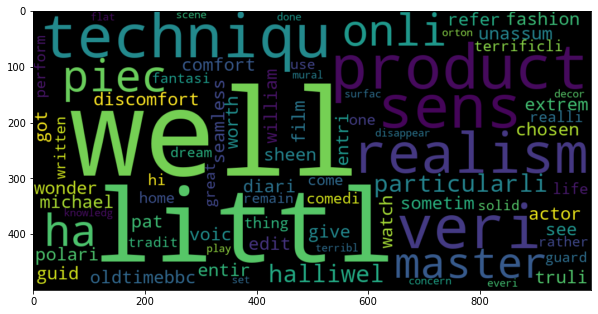

In [47]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

### Word cloud for negative review words



<function matplotlib.pyplot.show(*args, **kw)>

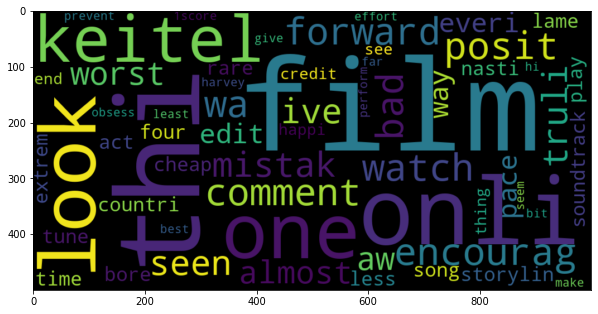

In [48]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show